In [53]:
%load_ext autoreload
%autoreload 2

from dataset.BRT_Dataset import BRT_Dataset
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import pandas as pd
from loguru import logger
import matplotlib.pyplot as plt
from skimage import measure
from scipy import ndimage

grid_size = 128
dataset = BRT_Dataset(data_dir="/Users/johncao/Documents/Programming/Stanford/AA276/project/outputs",
                        grid_size=grid_size,
                        device="cpu")

print(len(dataset))
sample = dataset[0]
print(sample["val_func"].shape)
print(sample["env_grid"].shape)

2025-05-16 00:16:17.473 | INFO     | dataset.BRT_Dataset:__init__:9 - Loaded 300 BRT samples.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
300
torch.Size([128, 128, 101])
torch.Size([128, 128])


In [60]:
def plot_value_function(tensor, threshold=0, x_interval=None, y_interval=None, z_interval=None):
    # Create figure and 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get coordinates where values are negative
    x_indices, y_indices, z_indices = np.where(tensor < threshold)
    values = tensor[x_indices, y_indices, z_indices]
    
    # Map indices to custom intervals if provided
    x_coords = x_indices.copy()
    y_coords = y_indices.copy()
    z_coords = z_indices.copy()
    
    if x_interval is not None:
        # Transform x indices to the specified interval
        x_min, x_max = x_interval
        x_size = tensor.shape[0] - 1  # Max index value
        x_coords = x_min + (x_indices / x_size) * (x_max - x_min)
    
    if y_interval is not None:
        # Transform y indices to the specified interval
        y_min, y_max = y_interval
        y_size = tensor.shape[1] - 1  # Max index value
        y_coords = y_min + (y_indices / y_size) * (y_max - y_min)
    
    if z_interval is not None:
        # Transform z indices to the specified interval
        z_min, z_max = z_interval
        z_size = tensor.shape[2] - 1  # Max index value
        z_coords = z_min + (z_indices / z_size) * (z_max - z_min)
    
    # Normalize the values for coloring
    if len(values) > 0:
        norm = plt.Normalize(values.min(), threshold)
        colors = plt.cm.coolwarm(norm(values))
        
        # Plot scatter points for negative values using the mapped coordinates
        scatter = ax.scatter(x_coords, y_coords, z_coords, 
                   c=values, cmap='coolwarm', alpha=0.8, 
                   s=50, edgecolor='none')
        
        # Add a colorbar
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
        cbar.set_label('Value')
        
        # Set labels and title
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        ax.set_title('Negative Values in 3D Tensor (Values < {})'.format(threshold))
        
        plt.tight_layout()
        plt.show()
    else:
        print("No negative values found in the tensor.")

2025-05-16 00:30:54.721 | INFO     | dataset.BRT_Dataset:__getitem__:4 - Loading sample from /Users/johncao/Documents/Programming/Stanford/AA276/project/outputs/10_May_2025_05_33/sample_1043


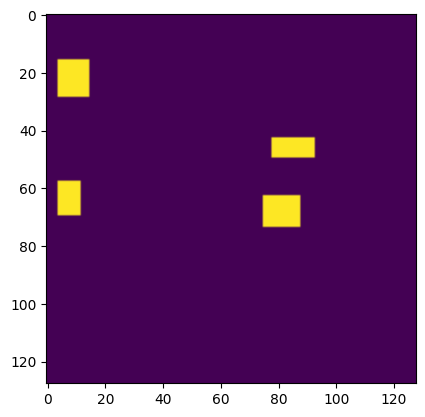

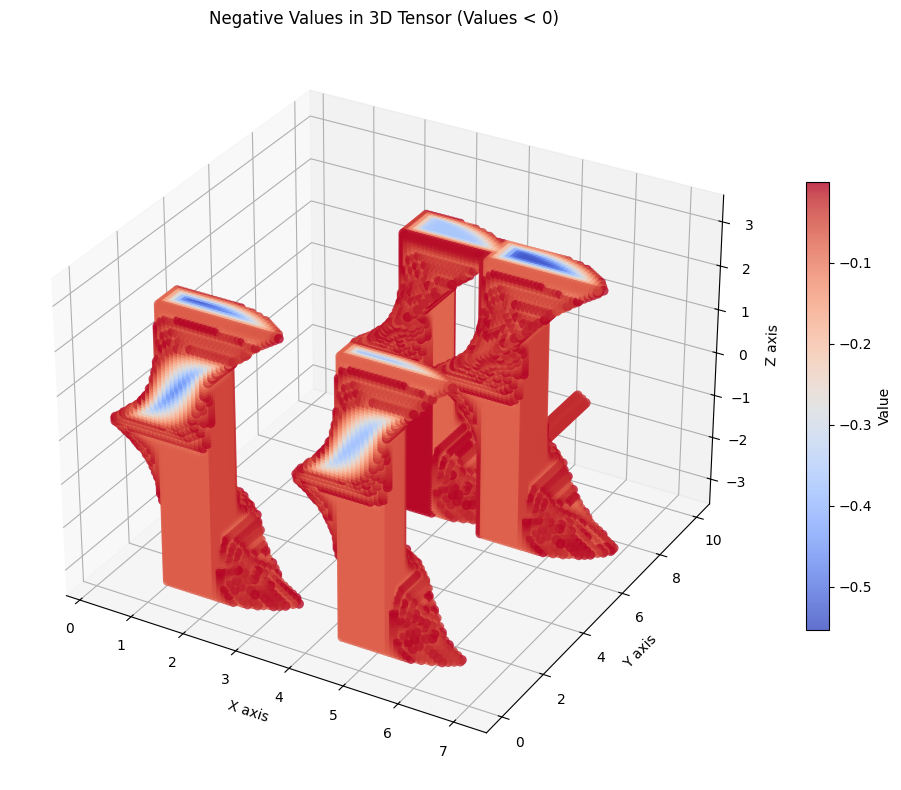

In [73]:
ind = 163
sample = dataset[ind]

fig = plt.figure()
plt.imshow(sample["env_grid"])
plt.show()

plot_value_function(sample["val_func"],
                    x_interval=(0, 10),
                    y_interval=(0, 10),
                    z_interval=(-np.pi, np.pi))


In [45]:
sample["val_func"].shape

torch.Size([128, 128, 101])

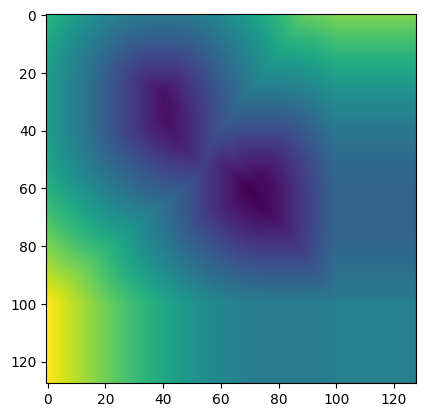

In [49]:
fig = plt.figure()
plt.imshow(sample["val_func"][:,:,10])
plt.show()

In [50]:
sample["val_func"][:,:,10]

tensor([[4.4571, 4.3749, 4.2933,  ..., 5.6298, 5.6298, 5.6298],
        [4.4015, 4.3182, 4.2356,  ..., 5.5381, 5.5381, 5.5381],
        [4.3476, 4.2632, 4.1795,  ..., 5.4466, 5.4466, 5.4466],
        ...,
        [7.1148, 7.0299, 6.9424,  ..., 2.7434, 2.7434, 2.7434],
        [7.1148, 7.0299, 6.9424,  ..., 2.7434, 2.7434, 2.7434],
        [7.1148, 7.0299, 6.9424,  ..., 2.7434, 2.7434, 2.7434]])